In [7]:
import torch
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from pathlib import Path
import sys
sys.path.append("..")
sys.path.insert(0, Path.cwd().parent)
sns.set()

##### Load data from a trained NN

In [8]:
path1 = Path("../saved_models/d5_d_t_5_240124-140853.pt")
path2 = Path("../saved_models/d5_d_t_5_240124-140926.pt")
path3 = Path("../saved_models/d5_d_t_5_240124-141054.pt")
path4 = Path("../saved_models/d7_d_t_11_240118-211740_load_f_d7_d_t_11_240109-114444_load_f_d7_d_t_11_240106-153206_load_f_d7_d_t_11_240102-115304.pt")
path5 = Path("../saved_models/d7_d_t_11_240106-143455.pt")
path6 = Path("../saved_models/d7_d_t_11_240201-161725.pt")
path7 = Path("../saved_models/d7_d_t_11_240201-173303.pt")
path8 = Path("../saved_models/d7_d_t_11_240202-103634.pt")
path9 = Path("../saved_models/d5_d_t_5_240206-224225.pt")
path10 = Path("../saved_models/d7_d_t_11_240213-134957_load_f_d7_d_t_11_240206-224558.pt")
path11 = Path("../saved_models/d7_d_t_11_240214-162014_load_f_d7_d_t_11_240206-224558.pt")
path12 = Path("../saved_models/d7_d_t_11_240218-220327_load_f_d7_d_t_11_240206-224558.pt")
path13 = Path("../saved_models/d9_d_t_5_240218-222950.pt")

paths = [path13]

100
Path 0
model_settings['hidden_channels_GCN']=[32, 128, 256, 512, 512, 256, 256]
model_settings['hidden_channels_MLP']=[256, 128, 64]
{'seed': None, 'dataset_size': 10000000, 'validation_set_size': 50000, 'batch_size': 12000, 'epochs': 1000, 'lr': 0.0001, 'device': 'cuda', 'resume_training': False, 'current_epoch': 0}
{'code_size': 9, 'repetitions': 5, 'min_error_rate': 0.001, 'max_error_rate': 0.005, 'm_nearest_nodes': 10, 'n_node_features': 5, 'power': 2, 'n_classes': 1}


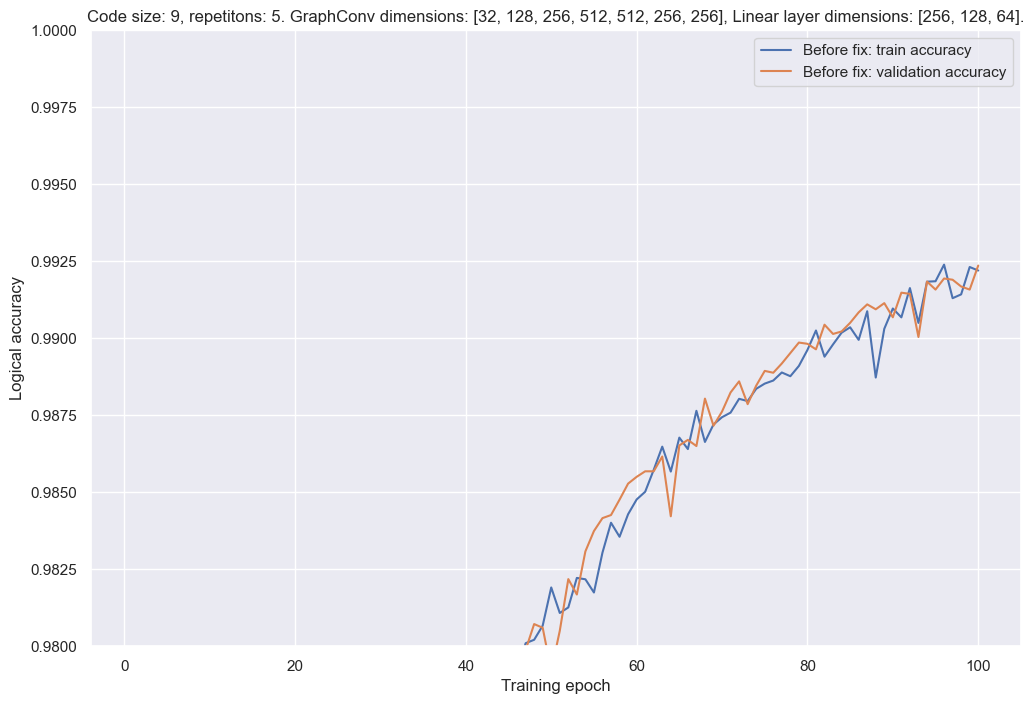

In [9]:
label = [
    ["Before fix: train accuracy", "Before fix: validation accuracy"],
    ["After fix: train accuracy", "After fix: validation accuracy"],
    ["After fix: train accuracy", "After fix: validation accuracy"],
    ["After fix: train accuracy", "After fix: validation accuracy"],
]

fig, ax = plt.subplots(figsize=(12, 8))

for i, path in enumerate(paths):

    training_data = torch.load(path, map_location="cpu")

    history = training_data["training_history"]

    train_loss = history["train_loss"]

    val_loss = history["val_loss"]

    train_accuracy = history["train_accuracy"]

    val_accuracy = history["val_accuracy"]


    n_epochs = history["epoch"] + 1
    print(n_epochs)
    t = range(1, n_epochs + 1)


    ax.plot(
        t,
        np.array([train_accuracy, val_accuracy]).T,
        label=label[i],
    )

    ax.set_xlabel("Training epoch")

    ax.set_ylabel("Logical accuracy")

    ax.set_ylim([0.98, 1.])


    title = (
        f"Code size: {training_data['graph_settings']['code_size']}, repetitons: {training_data['graph_settings']['repetitions']}. "
        + f"GraphConv dimensions: {training_data['model_settings']['hidden_channels_GCN']}, "
        + f"Linear layer dimensions: {training_data['model_settings']['hidden_channels_MLP']}."
    )

    ax.set_title(title)


    if "model_settings" in training_data:

        model_settings = training_data["model_settings"]

        print(f"Path {i}")

        print(f"{model_settings['hidden_channels_GCN']=}")

        print(f"{model_settings['hidden_channels_MLP']=}")


    # settings
    print(training_data["training_settings"])
    print(training_data["graph_settings"])


ax.legend()

In [16]:
const_data = np.load("const_data_quantization.npy")
const_data_fp = np.load("const_data_quantization_float.npy")
const_weights = np.load("const_weight_quantization.npy")
const_weights_fp = np.load("const_weight_quantization_float.npy")

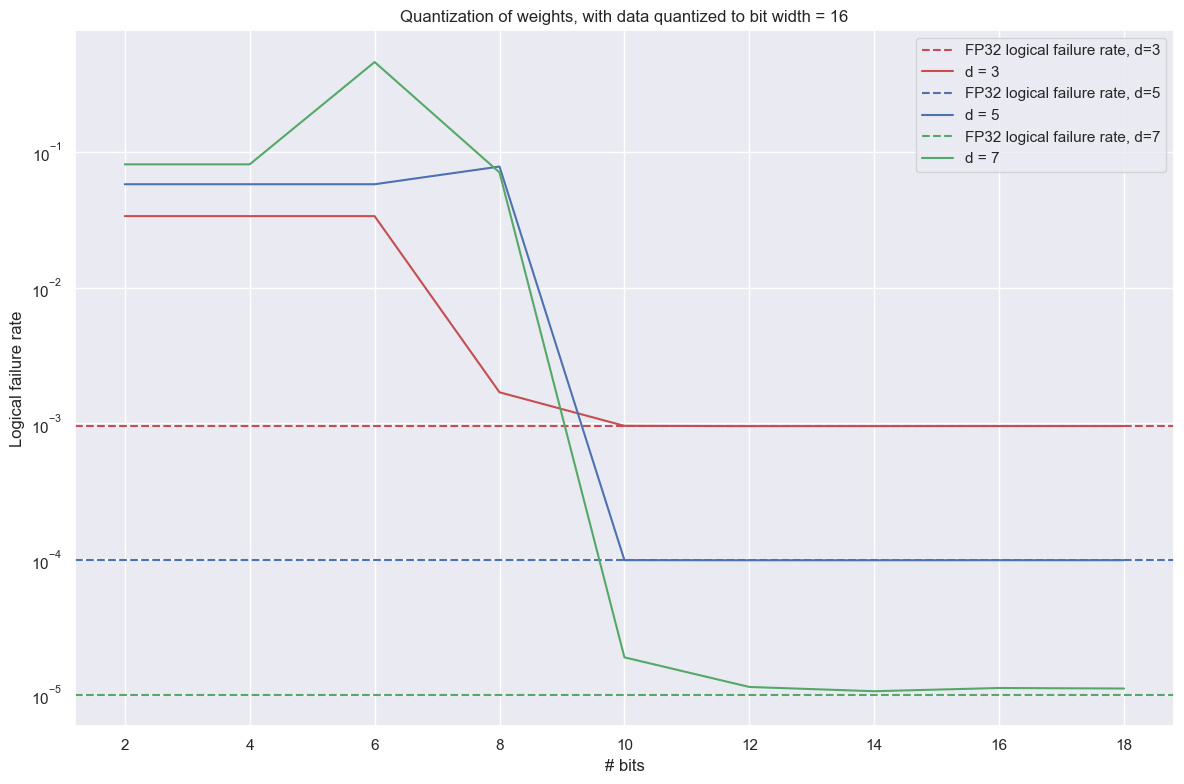

In [17]:
min_bits = 2
max_bits = 18
x = np.arange(min_bits, max_bits + 1, step=2)

fig, ax = plt.subplots(figsize=(12, 8))

colors = ["r", "b", "g"]
code_sz = [3, 5, 7]

for i, data in enumerate(zip(const_data, const_data_fp)):
    failure_rate, failure_rate_fp_model = data

    ax.axhline(
        failure_rate_fp_model,
        0,
        max_bits,
        linestyle="--",
        color=colors[i],
        label=f"FP32 logical failure rate, d={code_sz[i]}",
    )
    ax.semilogy(
        x,
        failure_rate,
        color=colors[i],
        label=f"d = {code_sz[i]}",
    )
    

ax.set_xlabel("# bits")
ax.set_ylabel("Logical failure rate")
ax.legend(loc="upper right")
ax.set_title(f"Quantization of weights, with data quantized to bit width = 16")


fig.tight_layout()
fig.savefig(f"../figures/bit_accuracy_const_data.pdf")



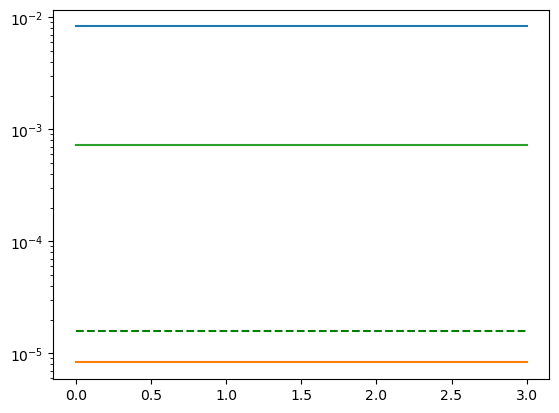

In [3]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.semilogy([0, 1, 2, 3], [0.00829] * 4)
ax.semilogy([0, 1, 2, 3], [0.00000829] * 4)
ax.semilogy([0, 1, 2, 3], [0.0007179] * 4)
ax.semilogy([0, 1, 2, 3], [1.59e-5] * 4, "--g")